#How to use GPT-4o and OpenAI’s functions for text classification

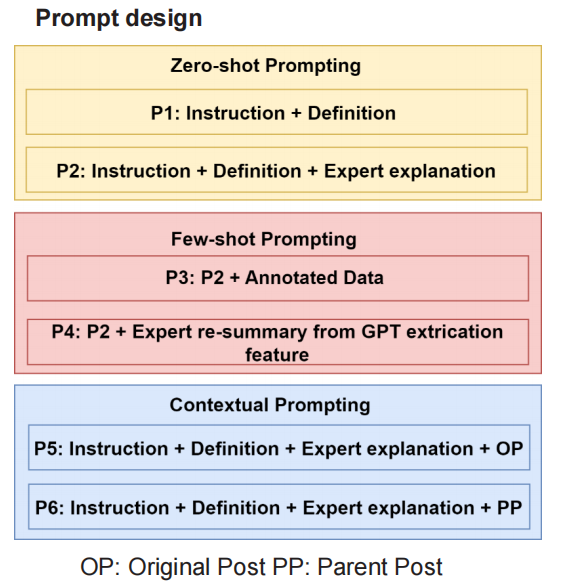

# 1. Zero-shot prompting

In [ ]:
# Install required libraries
!pip install openai pandas

In [ ]:
from google.colab import drive, files
# Upload your CSV file to Colab
uploaded = files.upload()

Saving dataset_for_LLMs.csv to dataset_for_LLMs.csv


In [ ]:
df = pd.read_csv('dataset_for_LLMs.csv')

In [ ]:
print(df)

   post_id                     post_title  post_score  \
0  199siwz  Closet ChatGPT user at work..         271   
1  199siwz  Closet ChatGPT user at work..         271   
2  199siwz  Closet ChatGPT user at work..         271   
3  199siwz  Closet ChatGPT user at work..         271   
4  199siwz  Closet ChatGPT user at work..         271   
5  199siwz  Closet ChatGPT user at work..         271   
6  199siwz  Closet ChatGPT user at work..         271   
7  199siwz  Closet ChatGPT user at work..         271   
8  199siwz  Closet ChatGPT user at work..         271   
9  199siwz  Closet ChatGPT user at work..         271   

                                            post_url comment_id parent_id  \
0  https://www.reddit.com/r/sysadmin/comments/199...    kihecrb       NaN   
1  https://www.reddit.com/r/sysadmin/comments/199...    kii7blp       NaN   
2  https://www.reddit.com/r/sysadmin/comments/199...    kigf1qp       NaN   
3  https://www.reddit.com/r/sysadmin/comments/199...    kighzot 

P2	Instruction + Definition + Expert explanation

https://chatgpt.com/share/673e7bc9-7ff0-800f-9b43-85b85da93efd

In [ ]:
import openai
import os
import pandas as pd
import time
from openai import OpenAI

# Set the correct OpenAI API key
os.environ["OPENAI_API_KEY"] = "sk-proj-VLXvpaY_-syGOKHFhhrvP92bganoHqykkA"
client = OpenAI(
            api_key = "sk-proj-VLXvpaY_-syGOKHFhhrv8KJ3zGZy5ZpuR1YPpvP92bganoHqykkA"
        )

# Initialize OpenAI client
openai.api_key = os.getenv("OPENAI_API_KEY")

In [ ]:
def get_classification(post):
    prompt = f""" ###Instruction###
    You are an experienced educational technology expert. Now you need to carefully categorize the following post according to the stages of cognitive presence. If the post content is a triggering event, return 1. If the post content is exploration, return 2. If the post content is integration, return 3. If the post content is solution, return 4. If the post content is other, return 5. Your answer can only be a number.
    ###Definition###
Five categories of cognitive presence:

1.Triggering Event. Definition: The triggering event includes stimulating curiosity, a core organizing concept or problem, a dilemma or issue that learners can relate to from their experience or previous studies, framing the issue, and eliciting questions or problems that learners see or have experienced. It involves assessing the state of learners' knowledge and generating unintended but constructive ideas.
Expert explanation: Indicators and Socio-cognitive processes include: a. recognize problem, such as presenting background information that may culminate in a question or presents a problem/issues. b. Sense of puzzlement, such as asking questions or messages that take discussion in a new direction.
2.Exploration. Definition: Exploration is inquisitive. It includes understanding the nature of the problem and then searching for relevant information and possible explanations. It involves group activities such as brainstorming, private activities like literature searches, and managing and monitoring this phase of divergent thinking so that it begins to be more focused.
Expert explanation: Indicators and Socio-cognitive processes include: a. Exploration within the online community, such as unsubstantiated agreement or disagreement/ contradiction of previous ideas, includes “good point” or “I agree” with or without unsubstantiated elaboration and personal experience is substantiated and may be considered integration. b. Exploration within a single message, such as many different ideas/themes presented in one message (use even if prompt requires pro/con instructions). c. Information exchange, such as personal narratives or description (not necessarily regarding personal experiences) or facts (ie., from sources such as websites, articles, programs, etc.)  and adds points but does not systematically defend/justify/ develop situation. d. Suggestions for consideration, such as author explicitly characterizes message as exploration. e. Leaps to conclusions, such as offers unsupported opinions.
3.Integration: Definition: Integration is tentative. It is a focused and structured phase of making meaning. Decisions are made about the integration of ideas, and the teacher must probe for understanding and misconceptions.
Expert explanation: Indicators and Socio-cognitive processes include: a. Integration among groups members, such as justified, developed, defensible, yet tentative hypothesis. b. Integration within a single message (response to prompt), such as reference to previous message followed by substantiated agreement or disagreement (I agree/disagree because...), and building on, adding to others’ ideas. c. Connecting ideas, synthesis, such as integrating information from one or more sources — textbook, articles, personal experience, other posts or peer contributions.
4.Resolution: Definition: Resolution involves resolving a dilemma or problem. It includes reducing complexity by constructing a meaningful framework or discovering a contextually specific solution. The confirmation or testing phase may be accomplished by direct or vicarious action.
Expert explanation: Indicators and Socio-cognitive processes include: a. Creating solutions, such as explicit characterization of message as a solution by participant. b. Vicarious application to real world testing solutions, such as providing examples of how problems were solved. c. Defending solutions, such as defending why a problem was solved in a specific manner.
5. Other: If the post does not belong to any of the above categories, please classify it as other.
Post: {post}
"""
    try:
       response = client.chat.completions.create(
           model="gpt-4o",
           messages=[
             {"role": "system", "content": "You are a helpful assistant."},
             {"role": "user", "content": prompt}
            ],
            max_tokens=100,
            temperature=0  # To keep it deterministic
      )

       result = response.choices[0].message.content # This line was incorrectly indented
       return result # Added return statement to return result from function
    except Exception as e: # Added try-expect block to handle potential errors
       print(f"Error processing request: {e}")
       return None


# Initialize the list to store results
P2_GPT4o_result = []

# Loop through each row in the DataFrame
for index, row in df.iterrows():
    post = row['comment_body']  # Get the post content from the 'comment_body' column
    print(f"Processing index: {index}")
    print("-" * 50)
    result = get_classification(post)  # Call the classification function

    # Check if the result is valid and append it to the result list
    if result is not None:
        P2_GPT4o_result.append(result.strip())  # Strip any extra spaces or newline characters
    else:
        P2_GPT4o_result.append("")  # Append an empty string if the result is None

# Add the results to a new column in the DataFrame
df['P2_GPT4o_result'] = P2_GPT4o_result

# Save the updated DataFrame to a CSV file
output_file = 'P2_2_output_file.csv'
df.to_csv(output_file, index=False)
print(f"Results saved to {output_file}")

Processing index: 0
--------------------------------------------------
Processing index: 1
--------------------------------------------------
Processing index: 2
--------------------------------------------------
Processing index: 3
--------------------------------------------------
Processing index: 4
--------------------------------------------------
Processing index: 5
--------------------------------------------------
Processing index: 6
--------------------------------------------------
Processing index: 7
--------------------------------------------------
Processing index: 8
--------------------------------------------------
Processing index: 9
--------------------------------------------------
Results saved to P2_2_output_file.csv


In [ ]:
print(df.to_csv)

<bound method NDFrame.to_csv of    post_id                     post_title  post_score  \
0  199siwz  Closet ChatGPT user at work..         271   
1  199siwz  Closet ChatGPT user at work..         271   
2  199siwz  Closet ChatGPT user at work..         271   
3  199siwz  Closet ChatGPT user at work..         271   
4  199siwz  Closet ChatGPT user at work..         271   
5  199siwz  Closet ChatGPT user at work..         271   
6  199siwz  Closet ChatGPT user at work..         271   
7  199siwz  Closet ChatGPT user at work..         271   
8  199siwz  Closet ChatGPT user at work..         271   
9  199siwz  Closet ChatGPT user at work..         271   

                                            post_url comment_id parent_id  \
0  https://www.reddit.com/r/sysadmin/comments/199...    kihecrb       NaN   
1  https://www.reddit.com/r/sysadmin/comments/199...    kii7blp       NaN   
2  https://www.reddit.com/r/sysadmin/comments/199...    kigf1qp       NaN   
3  https://www.reddit.com/r/sysa

# 2. Few-shot prompting

P3 Instruction (P1) + Definition + Annotated Data

https://chatgpt.com/share/673e7797-af44-800f-9ac4-6562eb2ae3b1

In [ ]:
def get_classification(post):
    prompt = f""" ###Instruction###
    You are an experienced educational technology expert. Now you need to carefully categorize the following post according to the stages of cognitive presence. If the post content is a triggering event, return 1. If the post content is exploration, return 2. If the post content is integration, return 3. If the post content is solution, return 4. If the post content is other, return 5. Your answer can only be a number.
    ###Definition###
Five categories of cognitive presence:

Four stages of cognitive presence:
Triggering Event. Definition: The triggering event includes stimulating curiosity, a core organizing concept or problem, a dilemma or issue that learners can relate to from their experience or previous studies, framing the issue, and eliciting questions or problems that learners see or have experienced. It involves assessing the state of learners' knowledge and generating unintended but constructive ideas.
Expert explanation: Indicators and Socio-cognitive processes include: a. recognize problem, such as presenting background information that may culminate in a question or presents a problem/issues. b. Sense of puzzlement, such as asking questions or messages that take discussion in a new direction.
Five examples of text samples belonging to Triggering Event, along with the indicative phrases are:
a. How about Every time I ask an LLM a question it gives me a confidently incorrect answer for a title?
b. I was teaching a friend how to solve for x y and z given three polynomials It gave wrong answers and I had to point it out to ChatGPT and correct its answer.
c. May I ask how you would prompt it in this case So far all I use GPT for is to ask for explanations on small snippets of code or for simple explanations.
d. Do you not have access to 4 Even in the playground where you dont need to pay for plus just usage.
e. Please dont use AI to replace all single quotes with double quotes.
Exploration. Definition: Exploration is inquisitive. It includes understanding the nature of the problem and then searching for relevant information and possible explanations. It involves group activities such as brainstorming, private activities like literature searches, and managing and monitoring this phase of divergent thinking so that it begins to be more focused.
Expert explanation: Indicators and Socio-cognitive processes include: a. Exploration within the online community, such as unsubstantiated agreement or disagreement/ contradiction of previous ideas, includes “good point” or “I agree” with or without unsubstantiated elaboration and personal experience is substantiated and may be considered integration. b. Exploration within a single message, such as many different ideas/themes presented in one message (use even if prompt requires pro/con instructions). c. Information exchange, such as personal narratives or description (not necessarily regarding personal experiences) or facts (ie., from sources such as websites, articles, programs, etc.)  and adds points but does not systematically defend/justify/ develop situation. d. Suggestions for consideration, such as author explicitly characterizes message as exploration. e. Leaps to conclusions, such as offers unsupported opinions.
Five examples of text samples belonging to Exploration, along with the indicative phrases are:
a. This And how universities basically operated until like the 70s.
b. I frankly think there is a technoology gap that is growing in the world more an more the tech savvy will surpass the ones that are left behind this will be reflected both in money and leverage in the world.
c. I asked it to create a philosophers stone and it just started talking about legends and myths 2 out of 5 stars.
d. Dota AI is pretty good Watch their games it is not incredibly limited They even wins against pros.
e. Can anyone do this or is that part of a subscription I would love to find a good way of learning maths as an adult who has a lack of understanding of some key concepts.
Integration: Definition: Integration is tentative. It is a focused and structured phase of making meaning. Decisions are made about the integration of ideas, and the teacher must probe for understanding and misconceptions.
Expert explanation: Indicators and Socio-cognitive processes include: a. Integration among groups members, such as justified, developed, defensible, yet tentative hypothesis. b. Integration within a single message (response to prompt), such as reference to previous message followed by substantiated agreement or disagreement (I agree/disagree because...), and building on, adding to others’ ideas. c. Connecting ideas, synthesis, such as integrating information from one or more sources — textbook, articles, personal experience, other posts or peer contributions.
Five examples of text samples belonging to Integration, along with the indicative phrases are:
a. Larry Wall was probably not thinking about guh I dont wanna thiiiink my brain hurtie when he thought about lazy but productive programmers.
b. Copilot X is not available yet.
c. Its wild that you think repeating the same dumb questions over and over does anything other than make you look like a crazy person.
d. Explain what I dont speak whatever language that is and my results for that search dont look like that Actually some of the same links are from the DDG search are in mine Anyway Im not saying Google is better than duck duck go you dont have to be so defensive Im saying duck duck go also 10 years ago was better than duck duck go today because the issue isnt solely on google for making google worse the issue is the internet in general is worse off
e. The only way systemic change happens is if enough people are suffering Change doesnt happen while the system gets bandaided over prolonging suffering to be bearable enough to prevent revolution is creating more suffering than drawing a line in the sand and calling for revolutionary change now Those fighting us in class warfare have made no concessions in the last 80 years why would they start now Were busying ourselves fighting for basuc rights stripped from us that is the length theyll go to supporting christian facism over any sort of united worker movement The state that allows human rights to be legislated away should be violently frustrated thats all there is to say Organize for real change.
Resolution: Definition: Resolution involves resolving a dilemma or problem. It includes reducing complexity by constructing a meaningful framework or discovering a contextually specific solution. The confirmation or testing phase may be accomplished by direct or vicarious action.
Expert explanation: Indicators and Socio-cognitive processes include: a. Creating solutions, such as explicit characterization of message as a solution by participant. b. Vicarious application to real world testing solutions, such as providing examples of how problems were solved. c. Defending solutions, such as defending why a problem was solved in a specific manner.
Five examples of text samples belonging to Resolution, along with the indicative phrases are:
a. You dont even have to use AI to solve that to be honest my assumption would be that theyre using something more complex than the average A algorithm but even A could make room for heuristics like that All else being equal if we did have road condition data I dont see why it couldnt be weighted into the pathfinding alg they currently use Though granted I have no idea what their pathfinding looks like under the hood Maybe Im being too optimistic
b. Please feel free to respond to my question So would you say law enforcement that is seeking to better identify Counterfeit Money are just rejecting technology and not being realistic Or dont lol Yes please scurry off
c. Cause it doesnt do math
d. I think they were referring to the DoD being one of the largest contributors to Tor for spiesinformants to use it to communicate
e. If you ask it for factual and true information it seems better
If the post does not belong to any of the above categories, please classify it as Other.

Post: {post}
"""
    try:
       response = client.chat.completions.create(
           model="gpt-4o",
           messages=[
             {"role": "system", "content": "You are a helpful assistant."},
             {"role": "user", "content": prompt}
            ],
            max_tokens=100,
            temperature=0  # To keep it deterministic
      )

       result = response.choices[0].message.content # This line was incorrectly indented
       return result # Added return statement to return result from function
    except Exception as e: # Added try-expect block to handle potential errors
       print(f"Error processing request: {e}")
       return None


# Initialize the list to store results
P3_GPT4o_result = []

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    post = row['comment_body']  # Get the post content from the 'comment_body' column
    print(f"Processing index: {index}")
    print("-" * 50)
    result = get_classification(post)  # Call the classification function

    # Check if the result is valid and append it to the result list
    if result is not None:
        P3_GPT4o_result.append(result.strip())  # Strip any extra spaces or newline characters
    else:
        P3_GPT4o_result.append("")  # Append an empty string if the result is None

# Add the results to a new column in the DataFrame
df['P3_GPT4o_result'] = P3_GPT4o_result

# Save the updated DataFrame to a CSV file
output_file = 'P3_output_file.csv'
df.to_csv(output_file, index=False)
print(f"Results saved to {output_file}")

Processing index: 0
--------------------------------------------------
Processing index: 1
--------------------------------------------------
Processing index: 2
--------------------------------------------------
Processing index: 3
--------------------------------------------------
Processing index: 4
--------------------------------------------------
Processing index: 5
--------------------------------------------------
Processing index: 6
--------------------------------------------------
Processing index: 7
--------------------------------------------------
Processing index: 8
--------------------------------------------------
Processing index: 9
--------------------------------------------------
Results saved to P3_output_file.csv


In [ ]:
print(df.to_csv)

<bound method NDFrame.to_csv of    post_id                     post_title  post_score  \
0  199siwz  Closet ChatGPT user at work..         271   
1  199siwz  Closet ChatGPT user at work..         271   
2  199siwz  Closet ChatGPT user at work..         271   
3  199siwz  Closet ChatGPT user at work..         271   
4  199siwz  Closet ChatGPT user at work..         271   
5  199siwz  Closet ChatGPT user at work..         271   
6  199siwz  Closet ChatGPT user at work..         271   
7  199siwz  Closet ChatGPT user at work..         271   
8  199siwz  Closet ChatGPT user at work..         271   
9  199siwz  Closet ChatGPT user at work..         271   

                                            post_url comment_id parent_id  \
0  https://www.reddit.com/r/sysadmin/comments/199...    kihecrb       NaN   
1  https://www.reddit.com/r/sysadmin/comments/199...    kii7blp       NaN   
2  https://www.reddit.com/r/sysadmin/comments/199...    kigf1qp       NaN   
3  https://www.reddit.com/r/sysa

#**GPT for SentimentAnalysis**

Paper: https://paperswithcode.com/task/aspect-based-sentiment-analysis

Github Repository: https://github.com/ScalaConsultants/Aspect-Based-Sentiment-Analysis

Sentiment Analysis with GPT-3 and GPT-3.5:
https://archive.is/m0dcF#selection-791.0-809.115

In [ ]:
%%capture
# update or install the necessary libraries
!pip install --upgrade openai
!pip install --upgrade langchain
!pip install --upgrade python-dotenv
!pip install --upgrade chromadb
!pip install tiktoken

In [ ]:
import openai

# Define API key
client = OpenAI(
            # Put your_api_key here
            api_key = "sk-proj-HS6aYq2gp230AgNryNKP4W0Fy_nRXrjGUA"
        )


# Define function to call the API
def analyze_aspects(text):
    # Generate the prompt
    prompt = generate_prompt(text)

    # Call the GPT API
    response = client.chat.completions.create(
        model="gpt-4",  # or "gpt-3.5-turbo", depending on the desired model
        messages=[
            {"role": "system", "content": "You are a helpful assistant for analyzing aspect terms."},
            {"role": "user", "content": prompt}
        ],
        max_tokens=200,
        n=1,
        stop=None,
        temperature=0
    )

    # Retrieve and return the response content
    return response.choices[0].message.content

# Define prompt template
def generate_prompt(text):
    template =  """
              Recognize all aspect terms with their corresponding sentiment polarity in the given review delimited by triple quotes. The aspect terms are nouns or phrases appearing in the review that indicate specific aspects or
              features of the product/service. Determine the sentiment polarity from the options [\"positive\", \"negative\", \"neutral\"]. Answer in the format [\"aspect\", \"sentiment\"] without any explanation. If no aspect
              term exists, then only answer \"[]\"."
               ```{text}```
           """
    return template.format(text=text)

# Example call
text = """

A five-seater SUV with an amazing variety of features, the Tata Nexon is priced impressively between Rs. 7.80 to 14.50 lakhs*.
It provides a wide range of customization possibilities with 65 versions, two engine choices, and two gearbox options.
It is a well-liked option in its market thanks to its svelte look and strong performance.
There is plenty of room for passengers and baggage in the Nexon's large cabin and 350-litre trunk. It can comfortably navigate rocky roads and terrain thanks to its 209 mm ground clearance. The Tata Nexon is a sleek and functional SUV for both families and adventurers, and it comes in nine appealing colours.
"""

result = analyze_aspects(text)
print(result)

["five-seater SUV", "positive"], ["variety of features", "positive"], ["Tata Nexon", "positive"], ["price", "positive"], ["customization possibilities", "positive"], ["65 versions", "positive"], ["two engine choices", "positive"], ["two gearbox options", "positive"], ["svelte look", "positive"], ["strong performance", "positive"], ["room for passengers and baggage", "positive"], ["large cabin", "positive"], ["350-litre trunk", "positive"], ["209 mm ground clearance", "positive"], ["sleek and functional SUV", "positive"], ["nine appealing colours", "positive"]


Prompts taken from: https://rafalrolczynski.com/2021/03/07/aspect-based-sentiment-analysis/